In [5]:
print('Hello')

Hello


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
data=pd.read_csv('Original Dataset\TESS_dataset.csv')

In [8]:
data.head()

,tfopwg_disp,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_dist,st_teff,st_logg,st_rad
0,FP,2459229.630,2.171348,2.01722,656.886099,5.818163,22601.94858,3127.204052,485.735,10249.0,4.19,2.16986
1,PC,2459987.949,1.931646,3.16600,1286.000000,11.215400,44464.50000,4045.000000,295.862,7070.0,4.03,2.01000
2,FP,2459224.688,1.867557,1.40800,1500.000000,23.752900,2860.61000,2037.000000,943.109,8924.0,NaN,5.73000
3,FP,2458493.396,2.743230,3.16700,383.410000,NaN,1177.36000,1631.000000,7728.170,5388.5,4.15,NaN
4,FP,2459987.047,3.573014,3.37000,755.000000,11.311300,54679.30000,4260.000000,356.437,9219.0,4.14,2.15000


In [9]:
data.columns

Index(['tfopwg_disp', 'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep',
       'pl_rade', 'pl_insol', 'pl_eqt', 'st_dist', 'st_teff', 'st_logg',
       'st_rad'],
      dtype='object')

In [10]:
data_ref=data.dropna(axis=0,how='any')

In [11]:
data_ref.head()

,tfopwg_disp,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_dist,st_teff,st_logg,st_rad
0,FP,2459229.630,2.171348,2.017220,656.886099,5.818163,22601.948580,3127.204052,485.735,10249.0,4.19000,2.169860
1,PC,2459987.949,1.931646,3.166000,1286.000000,11.215400,44464.500000,4045.000000,295.862,7070.0,4.03000,2.010000
4,FP,2459987.047,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,356.437,9219.0,4.14000,2.150000
7,PC,2459247.931,6.998921,3.953000,2840.000000,14.775200,448.744000,1282.000000,283.291,6596.0,3.71000,2.700000
10,KP,2458326.009,1.430370,1.616599,18960.712290,13.187450,1281.240825,1525.904809,375.310,5600.0,4.48851,0.890774


<Axes: >

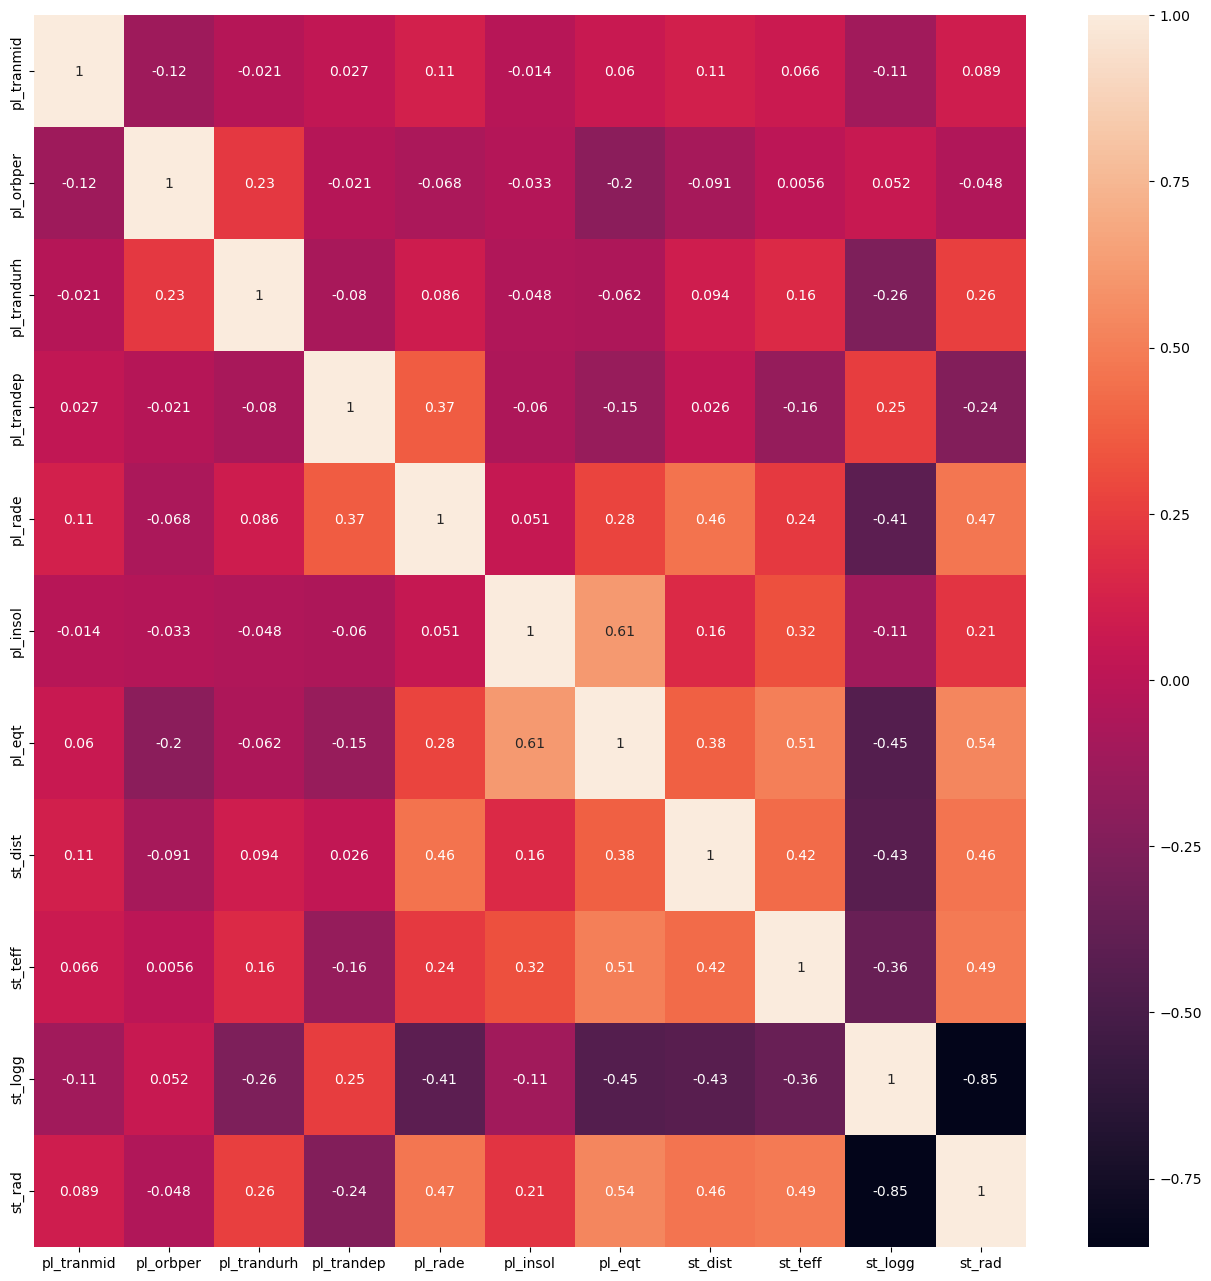

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(data_ref.select_dtypes(include='number').corr(),annot=True)

In [13]:
data_ref.drop_duplicates(keep='first').shape

(6592, 12)

In [14]:
data_ref.describe()

,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_dist,st_teff,st_logg,st_rad
count,6.592000e+03,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000,6592.000000
mean,2.459562e+06,19.243771,3.001761,7861.645555,10.053070,2177.513370,1277.753378,437.642936,5786.837614,4.302670,1.324254
std,6.148211e+02,103.133202,1.738326,11646.490692,6.584191,10974.415913,682.580761,378.282766,1474.820402,0.304114,0.651939
min,2.457926e+06,0.163821,0.101000,24.583493,0.552507,0.000342,37.000000,6.531270,2824.000000,0.100000,0.125969
25%,2.459199e+06,2.577449,1.836750,1342.735031,4.256284,81.728525,808.938682,169.750250,5268.675000,4.120000,0.882578
50%,2.459606e+06,4.228312,2.714762,4695.500000,10.485600,348.548500,1175.000000,348.600000,5823.000000,4.330000,1.220000
75%,2.459991e+06,8.375520,3.769000,10338.664460,13.901247,1134.535980,1585.000000,631.392000,6297.000000,4.500000,1.630000
max,2.460863e+06,1837.889731,30.015619,223710.000000,208.489000,280833.000000,6413.000000,9590.750000,50000.000000,5.960650,12.230000


In [15]:
data_ref[data_ref['tfopwg_disp']=='KP'].shape

(559, 12)

In [16]:
data_ref[data_ref['tfopwg_disp']=='FP'].shape

(943, 12)

In [17]:
data_ref[data_ref['tfopwg_disp']=='PC'].shape

(4006, 12)

In [18]:
data_ref[data_ref['tfopwg_disp']=='APC'].shape

(355, 12)

In [19]:
data_ref['tfopwg_disp'].unique()

array(['FP', 'PC', 'KP', 'APC', 'FA', 'CP'], dtype=object)

In [20]:
data_needed = data_ref[(data_ref['tfopwg_disp'] == 'FA') | 
                       (data_ref['tfopwg_disp'] == 'KP') | 
                       (data_ref['tfopwg_disp'] == 'FP') | 
                       (data_ref['tfopwg_disp'] == 'CP')]

In [21]:
data_needed.shape

(2231, 12)

In [22]:
data_needed.head()

,tfopwg_disp,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_dist,st_teff,st_logg,st_rad
0,FP,2459229.630,2.171348,2.017220,656.886099,5.818163,22601.948580,3127.204052,485.735,10249.0,4.19000,2.169860
4,FP,2459987.047,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,356.437,9219.0,4.14000,2.150000
10,KP,2458326.009,1.430370,1.616599,18960.712290,13.187450,1281.240825,1525.904809,375.310,5600.0,4.48851,0.890774
17,FP,2459238.831,12.688942,7.920100,3232.852789,14.060834,425.159418,1158.131037,368.646,7601.0,4.31000,1.536410
18,FP,2458518.965,1.104220,2.370000,14177.700000,21.044800,39459.300000,3926.000000,406.997,6995.2,4.07000,1.610000


In [23]:
X=data_needed.drop(columns=['tfopwg_disp'],axis=0)
X

,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_dist,st_teff,st_logg,st_rad
0,2459229.630,2.171348,2.017220,656.886099,5.818163,22601.948580,3127.204052,485.735,10249.0,4.19000,2.169860
4,2459987.047,3.573014,3.370000,755.000000,11.311300,54679.300000,4260.000000,356.437,9219.0,4.14000,2.150000
10,2458326.009,1.430370,1.616599,18960.712290,13.187450,1281.240825,1525.904809,375.310,5600.0,4.48851,0.890774
17,2459238.831,12.688942,7.920100,3232.852789,14.060834,425.159418,1158.131037,368.646,7601.0,4.31000,1.536410
18,2458518.965,1.104220,2.370000,14177.700000,21.044800,39459.300000,3926.000000,406.997,6995.2,4.07000,1.610000
...,...,...,...,...,...,...,...,...,...,...,...
7691,2458491.915,4.304380,3.037000,672.002000,13.756400,503.880000,1319.000000,785.176,6056.9,4.17000,4.820000
7697,2459229.900,2.396722,3.945317,384.898547,3.838449,15531.063620,2847.213599,543.152,10393.0,4.32000,1.877390
7700,2459230.149,8.413486,3.556833,17479.605330,20.510696,127.916421,857.731431,113.667,5786.0,4.52000,0.926261
7701,2459229.570,0.941436,1.360700,339.912662,4.529209,41562.587810,3641.626449,482.278,8322.0,4.01000,2.349860


In [24]:
Y=data_needed['tfopwg_disp']
Y

0       FP
4       FP
10      KP
17      FP
18      FP
        ..
7691    FP
7697    FP
7700    FP
7701    FP
7702    FP
Name: tfopwg_disp, Length: 2231, dtype: object

In [25]:
y_dummies=pd.get_dummies(Y,dtype=int)
print(y_dummies)

      CP  FA  FP  KP
0      0   0   1   0
4      0   0   1   0
10     0   0   0   1
17     0   0   1   0
18     0   0   1   0
...   ..  ..  ..  ..
7691   0   0   1   0
7697   0   0   1   0
7700   0   0   1   0
7701   0   0   1   0
7702   0   0   1   0

[2231 rows x 4 columns]


In [26]:
train_x,test_x,train_y,test_y=train_test_split(X,y_dummies,test_size=0.2,random_state=3)
train_x.head()

,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_dist,st_teff,st_logg,st_rad
839,2460298.678,8.082354,3.284000,559.000000,2.724320,140.474000,959.000000,104.158,5878.60,4.28000,1.24000
4172,2459475.610,2.790828,2.259987,10049.693880,16.755949,1998.781152,1705.340322,320.639,6635.91,4.24728,1.47070
7653,2458439.355,1.142880,1.699000,2270.000000,7.083640,3104.560000,2079.000000,211.593,6706.00,4.23000,1.51000
7522,2460063.008,11.550974,3.571000,10842.000000,11.025200,56.355000,763.000000,172.256,5625.00,4.49092,1.06000
3242,2459501.093,1.059099,0.985340,5155.297311,10.661656,18843.619050,2988.208030,1696.260,9332.00,4.50000,1.42848


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [28]:
from sklearn.multioutput import MultiOutputRegressor

In [29]:
LR_model=MultiOutputRegressor(LinearRegression())
LR_model.fit(train_x,train_y)

MultiOutputRegressor(estimator=LinearRegression())

In [30]:
y_predicted_LR=LR_model.predict(test_x)

In [31]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(test_y,y_predicted_LR)

r2=r2_score(test_y,y_predicted_LR)

In [32]:
print(mse,r2)

0.1472568034469281 0.08617933730768193


In [35]:
RF=RandomForestClassifier(n_estimators=220,max_depth=87)

In [34]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [36]:
model_rf1=RF.fit(train_x,train_y)
y_predicted_RF=model_rf1.predict(test_x)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_proba_rf = model_rf1.predict_proba(test_x)  # Probability scores

In [38]:
# 1. Accuracy
accuracy = accuracy_score(test_y, y_predicted_RF)
print(f"Accuracy: {accuracy:.4f}")

# 2. Detailed classification report
print("\nClassification Report:")
print(classification_report(test_y, y_predicted_RF))


Accuracy: 0.6219

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.50      0.60       129
           1       1.00      0.05      0.10        19
           2       0.80      0.77      0.79       203
           3       0.67      0.58      0.62        96

   micro avg       0.76      0.62      0.68       447
   macro avg       0.80      0.48      0.53       447
weighted avg       0.76      0.62      0.67       447
 samples avg       0.62      0.62      0.62       447



c:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize
    n_jobs=-1,               # Use all available cores
    verbose=1                # Show progress
)

# Fit grid search
grid_search.fit(train_x, train_y)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\purva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
343 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\purva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\purva\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\purva\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params


Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.645749535769364


In [ ]:
# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with best model
y_pred_best_rf = best_rf.predict(test_x)
y_pred_proba_best_rf = best_rf.predict_proba(test_x)

# Evaluate on test set
test_accuracy_best = accuracy_score(test_y, y_pred_best_rf)
print(f"Test Accuracy with Best Model: {test_accuracy_best:.4f}")
print("\nClassification Report:")
print(classification_report(test_y, y_pred_best_rf))


print(f"Improvement: {test_accuracy_best - accuracy:.4f}")

Test Accuracy with Best Model: 0.6488

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       129
           1       1.00      0.05      0.10        19
           2       0.83      0.79      0.81       203
           3       0.69      0.64      0.66        96

   micro avg       0.78      0.65      0.71       447
   macro avg       0.82      0.50      0.55       447
weighted avg       0.78      0.65      0.69       447
 samples avg       0.65      0.65      0.65       447

Improvement: 0.0000


c:\Users\purva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
